In [3]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader
import os
import pickle


In [17]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
folder = "USVND_dataset"

In [5]:
data_full = pd.DataFrame()
for fold in os.listdir(folder):
    for file in os.listdir(os.path.join(folder, fold)):
        data_full = pd.concat([data_full, pd.read_csv(os.path.join(folder, fold, file))])

In [6]:
data_full.to_csv("data_full.csv")

In [7]:
data_full.columns

Index(['time', 'alpha', 'd_alpha', 'delta', 'd_delta', 'Vx_set', 'K_set', 'Vx',
       'Vy', 'wz', 'K', 'V_err', 'wz_err', 'K_err', 'd_K_err', 'Se', 'Sn',
       'Ba', 'Ka', 'Kw', 'Vk', 'gamma_a', 'omega_k', 'aw', 'd_aw', 's_Vx',
       's_wz', 's_K', 'f_Vx_add', 'f_wz_add', 'f_K_add', 'f_Vx_mult',
       'f_wz_mult', 'f_K_mult'],
      dtype='object')

In [8]:
data_t_t = data_full.drop(columns=["time",'f_Vx_add', 'f_wz_add', 'f_K_add', 'f_Vx_mult',
       'f_wz_mult', 'f_K_mult'])

In [9]:
X_train, X_test, Y_train, Y_test = (
    train_test_split(data_t_t.drop(columns=['s_Vx','s_wz', 's_K']),
                     data_t_t[['s_Vx', 's_wz', 's_K']])
)

In [10]:
modelRF = RandomForestClassifier()
modelRF.fit(X_train, Y_train)

RandomForestClassifier()

In [11]:
filename_model = 'RFmodel.pkl'
pickle.dump(modelRF, open(filename_model, 'wb')) 

In [12]:
result_RF = modelRF.predict(X_test)

In [13]:
modelNC = KNeighborsClassifier()
modelNC.fit(X_train, Y_train)

KNeighborsClassifier()

In [14]:
filename_model = 'NCmodel.pkl'
pickle.dump(modelNC, open(filename_model, 'wb')) 

In [15]:
result_NC = modelNC.predict(X_test)

In [19]:
print(classification_report(Y_test, result_RF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    148102
           1       1.00      1.00      1.00    188891
           2       1.00      1.00      1.00    171590

   micro avg       1.00      1.00      1.00    508583
   macro avg       1.00      1.00      1.00    508583
weighted avg       1.00      1.00      1.00    508583
 samples avg       0.31      0.31      0.31    508583



In [20]:
print(classification_report(Y_test, result_NC))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    148102
           1       1.00      1.00      1.00    188891
           2       1.00      1.00      1.00    171590

   micro avg       1.00      1.00      1.00    508583
   macro avg       1.00      1.00      1.00    508583
weighted avg       1.00      1.00      1.00    508583
 samples avg       0.31      0.31      0.31    508583



array([[<Axes: title={'center': 's_Vx'}>,
        <Axes: title={'center': 's_wz'}>],
       [<Axes: title={'center': 's_K'}>, <Axes: >]], dtype=object)

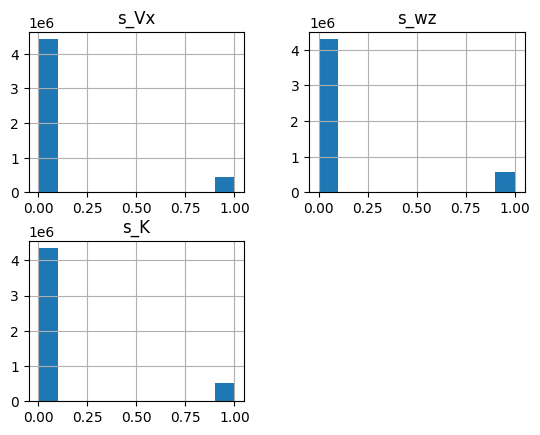

In [25]:
Y_train.hist()

array([[<Axes: title={'center': 's_Vx'}>,
        <Axes: title={'center': 's_wz'}>],
       [<Axes: title={'center': 's_K'}>, <Axes: >]], dtype=object)

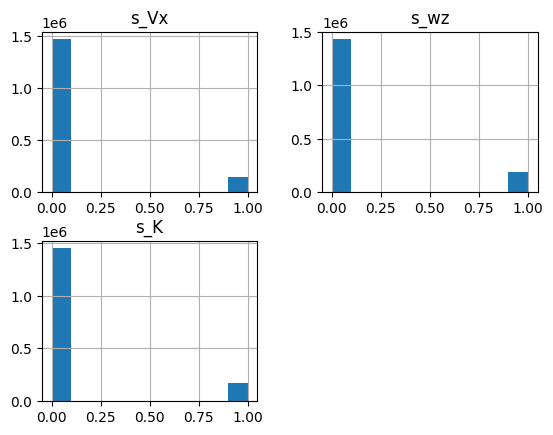

In [26]:
Y_test.hist()